In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv(".../input/Train.csv",index_col=False)

In [6]:
clean_df = df.drop(columns=['EmpID','EmpName','Gender','BiasInfluentialFactor'])

In [8]:
encoder = LabelEncoder()
X = clean_df[['TotalLeavesTaken','CurrentCTC','ExpectedCTC','EmpScore','CurrentCompanyType']]
Y = clean_df['FitmentPercent']
label = encoder.fit_transform(X["CurrentCompanyType"])
X['CurrentCompanyType'] = label

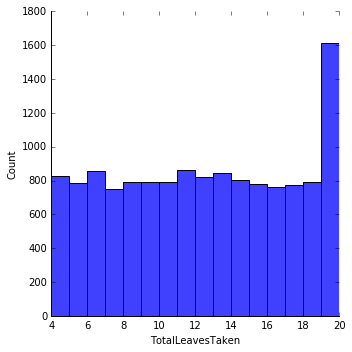

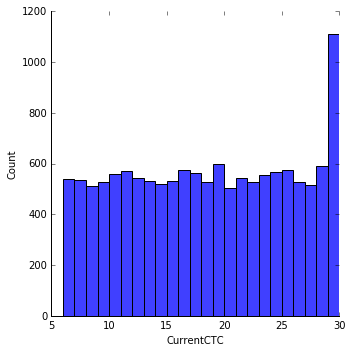

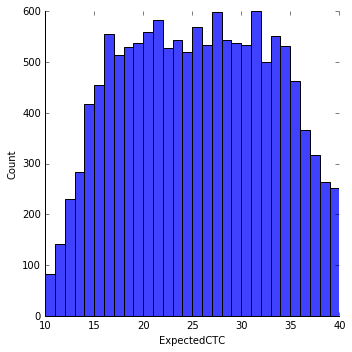

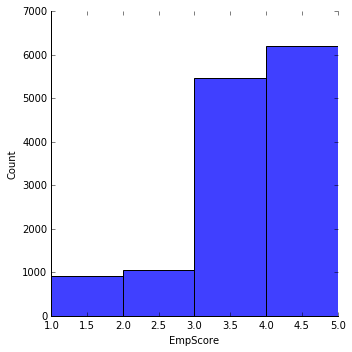

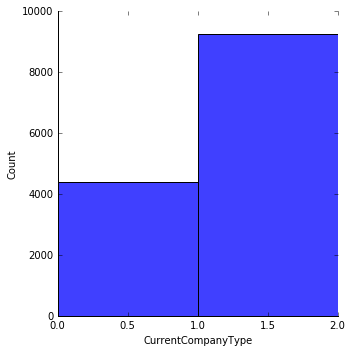

In [249]:
for col in X.columns:
    sns.displot(X, x=col, binwidth=1)

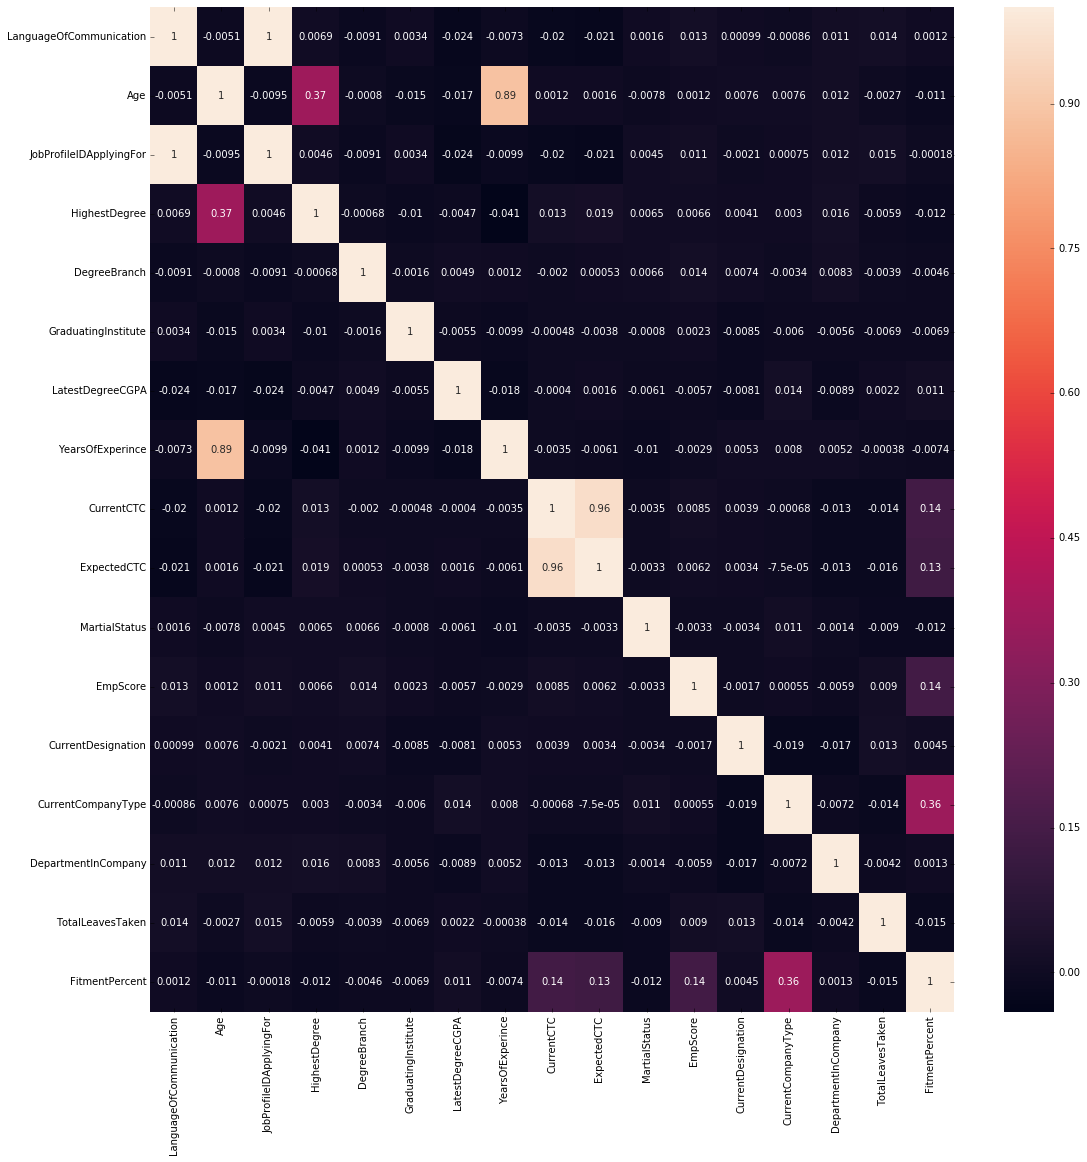

In [147]:
plt.figure(figsize=(18,18))
sns.heatmap(eda_data.corr(), annot=True)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [252]:
DecisionTreeRegModel = DecisionTreeRegressor()
DecisionTreeRegModel.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [3]:
y_pred = DecisionTreeRegModel.predict(X_test)
r2_score(y_test, y_pred)

In [12]:
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [2]:
y_pred = clf.predict(X_test)
r2_score(y_test, y_pred)

In [1]:
mse = mean_squared_error(y_test, y_pred)
mse